## [통계적머신러닝] 과제5
통계학과 2019150419 기다연<br>
2021.10.12

### 문제1.
제 5장의 wine data를 이용하여 linear, quadratic 그리고 naive Bayesian을 적용하여 그 결과를 비교하고 해석하라.<br>
<br>
그리고 교수님의 첨언,
- 특성변수가 output에 미치는 영향을 추정된 모수로 해석할 수 있어야 합니다. 머신러닝은 black-box가 아닙니다.
- 모형의 정밀도와 손실값을 최소로 하는 궁극적인 목표는 특성변수의 계수를 추정하여 output에 대한 영향을 해석하고 설명하는 것입니다.
- 단순하게 프로그램 결과만 나열하는 하는 것은 해석이 아닙니다.
- 왜 그런지 고민해 보고 원인을 설명해야 합니다.

In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [3]:
dataset = datasets.load_wine()
dat_wine = pd.DataFrame(dataset.data, columns=dataset.feature_names)
dat_wine['target'] = dataset.target
dat_wine.columns = ['alchohol', 'malic acid', 'ash', 
                    'alcalinity of ash', 'magnesium', 'total phenols', 
                    'flavanoids', 'nonflavanoid phenols', 
                    'proanthocyanins', 'color intensity', 'hue', 
                    'OD208', 'proline', 'class label']  # Column names
dat_wine.head()

,alchohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD208,proline,class label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
print(dat_wine.shape)

(178, 14)


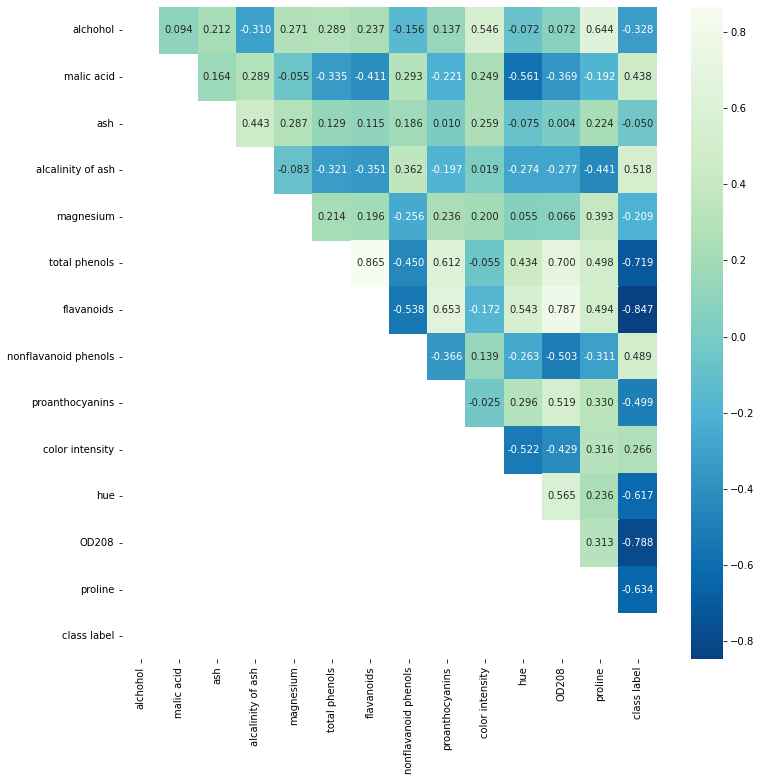

In [5]:
import matplotlib as plt
import matplotlib.pyplot as plt 
import seaborn as sns

corr_mat = dat_wine.corr()
mask = np.zeros_like(corr_mat,dtype=np.bool)
mask[np.tril_indices_from(mask)]=True

plt.figure(figsize=(12,12))
sns.heatmap(corr_mat, annot = True, cmap='GnBu_r', mask=mask,fmt='.3f')
plt.show()

In [6]:
dat_wine.describe()

,alchohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD208,proline,class label
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [7]:
# train/test data split
dat_wine.dropna(inplace=True)  # 결측치 제거

X = dat_wine.drop(['class label'], axis=1)
y = dat_wine['class label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(124, 13) (54, 13) (124,) (54,)


In [8]:
# 표준화
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [9]:
display(X_train.head(3))
display(X_test.head(3))

,alchohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD208,proline
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480.0
118,12.77,3.43,1.98,16.0,80.0,1.63,1.25,0.43,0.83,3.4,0.70,2.12,372.0
155,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.9,0.60,1.48,725.0


,alchohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD208,proline
142,13.52,3.17,2.72,23.5,97.0,1.55,0.52,0.50,0.55,4.35,0.89,2.06,520.0
152,13.11,1.90,2.75,25.5,116.0,2.20,1.28,0.26,1.56,7.10,0.61,1.33,425.0
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660.0


### 1. LDA (linear)
- 각 집단은 동일한 분산을 갖는다고 가정
- 각 집단은 정규분포를 따름

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

cld = LinearDiscriminantAnalysis(solver = 'svd', store_covariance=True) 
cld.fit(X_train, y_train)
y_train_pred = cld.predict(X_train)
y_test_pred = cld.predict(X_test)

In [11]:
# LDA
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 

print('LDA Accuracy: ', str(accuracy_score(y_test, y_test_pred)))
print('LDA Confusion matrix: \n', str(confusion_matrix(y_test, y_test_pred)))

LDA Accuracy:  0.9814814814814815
LDA Confusion matrix: 
 [[18  0  0]
 [ 0 20  1]
 [ 0  0 15]]


In [12]:
print('LDA 평균추정치: \n', str(cld.means_))  # means: 속성 (1번째 class의 mean)
print('-'*100)
print('LDA 전체 평균추정치: \n', str(cld.xbar_))  # 전체에 대한 mean
print('-'*100)
print('LDA 분산추정치: \n', str(cld.covariance_))  # covariance
print('-'*100)
print('LDA 클래스별 판별식의 bias: \n', str(cld.intercept_))  # intercept
print('-'*100)
print('LDA 계수추정치: \n', str(cld.coef_))  # coefficient

LDA 평균추정치: 
 [[1.36785366e+01 2.02317073e+00 2.45439024e+00 1.71365854e+01
  1.05341463e+02 2.86219512e+00 3.02731707e+00 2.89268293e-01
  1.95634146e+00 5.52000000e+00 1.06878049e+00 3.15609756e+00
  1.11382927e+03]
 [1.22118000e+01 2.02160000e+00 2.27140000e+00 2.06780000e+01
  9.34000000e+01 2.21060000e+00 2.04080000e+00 3.84000000e-01
  1.58700000e+00 3.04620000e+00 1.04052000e+00 2.77820000e+00
  4.94980000e+02]
 [1.31745455e+01 3.56666667e+00 2.42181818e+00 2.13181818e+01
  1.00212121e+02 1.68151515e+00 7.77878788e-01 4.48787879e-01
  1.17727273e+00 7.49424242e+00 6.86363636e-01 1.68090909e+00
  6.49090909e+02]]
----------------------------------------------------------------------------------------------------
LDA 전체 평균추정치: 
 [1.29529839e+01 2.43330645e+00 2.37193548e+00 1.96774194e+01
 9.91612903e+01 2.28524194e+00 2.03088710e+00 3.69919355e-01
 1.60008065e+00 5.04790323e+00 9.55612903e-01 2.61112903e+00
 7.40612903e+02]
---------------------------------------------------------

In [57]:
# 확률 추정
print(cld.predict_proba(X_test[:5])) 

[[4.82027630e-11 9.53699966e-06 9.99990463e-01]
 [4.16120014e-19 1.20023483e-09 9.99999999e-01]
 [4.13851085e-15 2.75591141e-12 1.00000000e+00]
 [7.51250315e-05 9.99924835e-01 3.97700359e-08]
 [5.24688464e-07 9.99999475e-01 9.27968095e-16]]


In [58]:
y_test_pred

array([2, 2, 2, 1, 1, 0, 1, 0, 1, 2, 2, 0, 1, 0, 2, 1, 0, 0, 0, 2, 0, 1,
       1, 0, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 1, 2, 0, 2, 0, 0,
       0, 1, 0, 2, 1, 0, 1, 0, 0, 2])

In [59]:
# 96번 데이터만 오분류 (2인데 3로 오분류)
X_test.loc[X_val.index==96]

,alchohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD208,proline
96,11.81,2.12,2.74,21.5,134.0,1.6,0.99,0.14,1.56,2.5,0.95,2.26,625.0


In [60]:
cld.predict_proba(X_test.loc[X_test.index==96])

array([[1.83752633e-07, 3.12286099e-01, 6.87713717e-01]])

In [14]:
# Cross validation
from numpy import std, mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(cld, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (Standard deviation: %.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.942 (Standard deviation: 0.089)


### 2. QDA (quadratic)
- 범주별 공분산의 구조가 확연히 다른 경우에 사용

In [15]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

cqd=QuadraticDiscriminantAnalysis(store_covariance=True)
cqd.fit(X_train, y_train) # QDA 적합
y_train_pred=cqd.predict(X_train)
y_test_pred=cqd.predict(X_test)

In [16]:
# QDA
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 

print('QDA Accuracy: ', str(accuracy_score(y_test, y_test_pred)))
print('QDA Confusion matrix: \n',str(confusion_matrix(y_test, y_test_pred)))

QDA Accuracy:  0.9629629629629629
QDA Confusion matrix: 
 [[18  0  0]
 [ 1 20  0]
 [ 0  1 14]]


In [17]:
print('QDA 평균추정치: \n', str(cqd.means_))  # means: 속성 (1번째 class의 mean)
print('-'*100)
print('QDA 분산추정치: \n', str(cqd.covariance_))  # covariance

QDA 평균추정치: 
 [[1.36785366e+01 2.02317073e+00 2.45439024e+00 1.71365854e+01
  1.05341463e+02 2.86219512e+00 3.02731707e+00 2.89268293e-01
  1.95634146e+00 5.52000000e+00 1.06878049e+00 3.15609756e+00
  1.11382927e+03]
 [1.22118000e+01 2.02160000e+00 2.27140000e+00 2.06780000e+01
  9.34000000e+01 2.21060000e+00 2.04080000e+00 3.84000000e-01
  1.58700000e+00 3.04620000e+00 1.04052000e+00 2.77820000e+00
  4.94980000e+02]
 [1.31745455e+01 3.56666667e+00 2.42181818e+00 2.13181818e+01
  1.00212121e+02 1.68151515e+00 7.77878788e-01 4.48787879e-01
  1.17727273e+00 7.49424242e+00 6.86363636e-01 1.68090909e+00
  6.49090909e+02]]
----------------------------------------------------------------------------------------------------
QDA 분산추정치: 
 [array([[ 1.88392805e-01,  6.34225610e-03, -4.89091463e-03,
        -3.39720122e-01,  6.89012195e-01,  8.64857927e-02,
         1.01840976e-01,  3.54390244e-03,  7.13220122e-02,
         2.42672500e-01,  9.28067073e-03, -1.68353659e-04,
         3.81782439e+01

In [18]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(cqd, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (Standard deviation: %.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.627 (Standard deviation: 0.195)


### 3. Gaussian Naive Bayes
- 모든 변수들을 서로 조건부 독립이라고 가정함

In [20]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
g_train_pred = gnb.predict(X_train)
g_test_pred = gnb.predict(X_test)

print(accuracy_score(y_test, g_test_pred)) 
print(confusion_matrix(y_test, g_test_pred))

0.9814814814814815
[[17  1  0]
 [ 0 21  0]
 [ 0  0 15]]


In [24]:
# 1인데 2로 분류
display(dat_wine.query('index==25'))
print(gnb.predict_proba(X_test.loc[X_test.index==25]) )

,alchohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD208,proline,class label
25,13.05,2.05,3.22,25.0,124.0,2.63,2.68,0.47,1.92,3.58,1.13,3.2,830.0,0


[[2.66728538e-02 9.73327146e-01 4.27853938e-24]]


In [22]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(gnb, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (Standard deviation: %.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.951 (Standard deviation: 0.092)


### 4. Multinomial NB

In [45]:
from sklearn.naive_bayes import MultinomialNB

gnb = MultinomialNB()
gnb.fit(X_train, y_train)
g_train_pred = gnb.predict(X_train)
g_test_pred = gnb.predict(X_test)

print(accuracy_score(y_test, g_test_pred)) 
print(confusion_matrix(y_test, g_test_pred))

0.7407407407407407
[[15  0  3]
 [ 2 13  6]
 [ 0  3 12]]
